# Project 2: Predict Video Game Ratings - Ahmed Tanveer
    
   

In this project we will be continuing on Project 1 where we performed analysis to help us predict Video Game Ratings Using Machine Learning and Data Visualization tools using training data.

The goal of this project is to produce results more accurate than the previous project. This could be either cleaning up the data from the last project or finding another method of Machine Learning that will product these results.

<i> I may restate things that have been previously decribed in the previous project to make sure that this version can act as it's own standalone project as well.

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

First we imported all the necessary tools. Here we are going to begin with using the Random Forest training model to get our results as we learned that was effective in the previous project. I chose Random Forest Training due to its simplicity in implementation and speed at generating results.

In [2]:
data = pd.read_csv('Video_games_esrb_rating.csv')
test_data = pd.read_csv('test_esrb.csv')

Next I imported the training data and the testing data respectively that I had found on Kaggle. These datasheets have multiple columns (e.g. hasDrugUse, hasAlchohol, hasSuggestiveThemes, hasBlood) with binary values as True or False with a final rating of the ESRB Rating given to the game

Link to the Kaggle data source: https://www.kaggle.com/code/sachacuster/starter-video-games-rating-by-esrb

In [3]:
#print(data)

X = data.drop('esrb_rating', axis=1)
#Drop title
X = X.drop('title', axis=1)
y = data['esrb_rating']

Here we begin to clean up the data, as attempting to run the training model without this step will result to errors and/or undesirable results due to the bad data. The data we will be cleaning up is splitting the rating and the game tags to be properly inputted into the Random Forest Model as well as removing the title, as all the values in the Random Forest Model in Python appears to require float values.

In [4]:
# Create the Random Forest Model
model = RandomForestClassifier(n_estimators=1000, random_state=50)

# Fit the Model with the cleaned up data

model.fit(X,y)

RandomForestClassifier(n_estimators=1000, random_state=50)

In this Model, I found that setting size to 1000 was a reasonable number as increasing this number any more would not result in more percise results, yet would lead to an increased computational time.

After creating the model with this limitation, we passed in the Training Data and the true ratings of the games to create the prediction model

In [5]:
y_pred = model.predict(X)

# Print classification report and confusion matrix
print(classification_report(y, y_pred))
print(confusion_matrix(y, y_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           E       0.97      0.98      0.98       416
          ET       0.87      0.90      0.89       403
           M       0.94      0.94      0.94       387
           T       0.92      0.89      0.91       689

    accuracy                           0.92      1895
   macro avg       0.93      0.93      0.93      1895
weighted avg       0.92      0.92      0.92      1895

[[409   5   0   2]
 [ 10 364   0  29]
 [  0   0 363  24]
 [  2  48  23 616]]
Accuracy: 0.9245382585751979


Creating the Confusion Matrix shows us valuable information about the model. Here, we simply passed back in the same game tag data that was used to train the model. We can see that the model is already at 92% accuracy at predicting this data. I used this step mainly as a santity check, to ensure that the model is working accurately with the given data.


The Confusion Matrix generated shows us that the model is the least accurate with predicting which games are the ET rating, but highly accurate with every other rating.

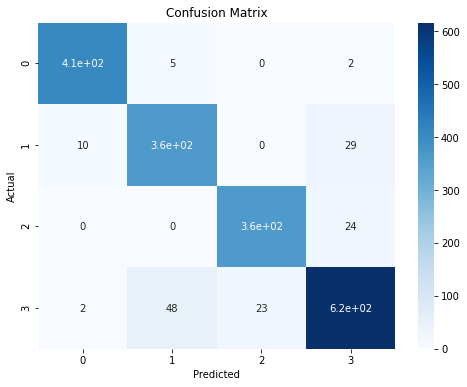

In [6]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

I then generated a graph to help visualize the Confusion Matrix. From this generated graph we can read it as when the value predicted equals the value actual, we have a correct prediction and any other pair of actual and predicted values are false values. This graph helps us visualize the fact that many of the games actually rated ET are being labeled as being T. We can expect this due to large number of overlap that occurs between the two ESRP game ratings.

In [7]:
# Prep the testing dataset in the same way

X2 = test_data.drop('esrb_rating', axis=1)
X2 = X2.drop('title', axis=1)
y2 = test_data['esrb_rating']

Here, we are prepping the testing data to be used against the prediction, this data is different from the training dataset and will allow us to see how accurate this model is with new data.

In [8]:
y_pred = model.predict(X2)

              precision    recall  f1-score   support

           E       0.95      0.95      0.95       100
          ET       0.85      0.89      0.87       126
           M       0.89      0.64      0.75        90
           T       0.79      0.87      0.83       184

    accuracy                           0.85       500
   macro avg       0.87      0.84      0.85       500
weighted avg       0.85      0.85      0.85       500

[[ 95   4   0   1]
 [  4 112   0  10]
 [  0   0  58  32]
 [  1  16   7 160]]
Accuracy: 0.85


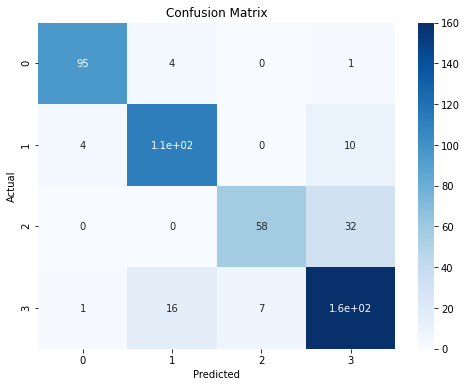

In [9]:
# Print classification report and confusion matrix
print(classification_report(y2, y_pred))
print(confusion_matrix(y2, y_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y2, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y2, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

From running these steps, we can see that this model has a 85% accuracy on predicting what ESRP rating video games will get based upon the tags each game is given due to their content. In this model, we can see that the largest area of mistakes are from games that are actually rated T being mislabeled as other ratings. This is largely due to the fact that rated T games are the most common in this dataset, alongside the fact that games rated T have the highest overlap with games rated ET and games rated M.

Column 0: console
Column 1: alcohol_reference
Column 2: animated_blood
Column 3: blood
Column 4: blood_and_gore
Column 5: cartoon_violence
Column 6: crude_humor
Column 7: drug_reference
Column 8: fantasy_violence
Column 9: intense_violence
Column 10: language
Column 11: lyrics
Column 12: mature_humor
Column 13: mild_blood
Column 14: mild_cartoon_violence
Column 15: mild_fantasy_violence
Column 16: mild_language
Column 17: mild_lyrics
Column 18: mild_suggestive_themes
Column 19: mild_violence
Column 20: no_descriptors
Column 21: nudity
Column 22: partial_nudity
Column 23: sexual_content
Column 24: sexual_themes
Column 25: simulated_gambling
Column 26: strong_janguage
Column 27: strong_sexual_content
Column 28: suggestive_themes
Column 29: use_of_alcohol
Column 30: use_of_drugs_and_alcohol
Column 31: violence


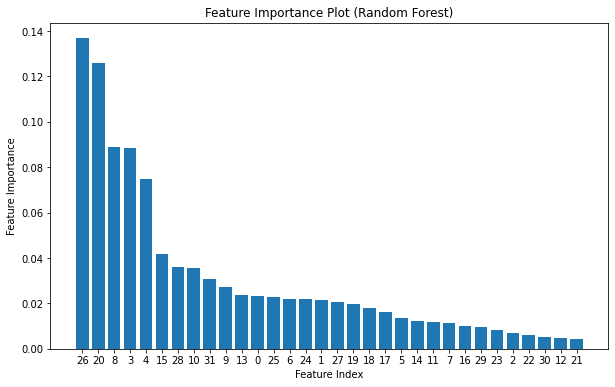

In [10]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

for idx, col_name in enumerate(X.columns):
    print(f"Column {idx}: {col_name}")

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), indices)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Plot (Random Forest)')
plt.show()

<b> We did this already, let's try something deeper.</b>

In [11]:
#pip install xgboost

In [12]:
import xgboost as xgb

I'm going to attempt to use a Gradient Boosting Machine method to perform the analysis on this dataset and see if this method of prediction would lead to higher accuracies in predictions.

In [13]:
data = pd.read_csv('Video_games_esrb_rating.csv')


X = data.drop('esrb_rating', axis=1)
X = X.drop('title',axis=1)
y = data['esrb_rating']

# Mapping for swapping all ratings to floats
mapping = {'E': 1.0, 'ET': 2.0, 'T': 3.0, 'M': 4.0}


y_float = [mapping[val] for val in y]

X_train, X_test, y_train, y_test = train_test_split(X, y_float, test_size=0.2, random_state=42)


The Gradient Boosting Machine was significantly more meticulous in it's implemenation causing me to go through significantly more errors in order to produce the results. The first issue I was facing was that the model would not accept any string values, causing me to need to convert all the rating types into integer values to produce results. I did this through creating a mapping in order to swap the values effectively. After this, I also attempted to use only the 'Video_game_esrb_rating.csv' and split it into a training and testing model. This was a tool I learned about in the previous project and wanted to see how I would implement it into my Machine Learning methodologies.

In [14]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert the dataset into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train_encoded)
dtest = xgb.DMatrix(X_test, label=y_test_encoded)


print(dtest)


# Set the parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Multiclass classification
    'num_class': 4,  # Number of classes
    'max_depth': 3,  # Maximum depth of a tree
    'eta': 0.1,  # Learning rate
}

# Train the model
num_round = 100
bst = xgb.train(params, dtrain, num_round)


y_pred = bst.predict(dtest)

From here, the next issue I ran into was that the label inputs into the DMatrix were not formatted properly for the training model. I had tried a couple different ways of solving this, but the only true solution I had found was to use a LabelEncoder and transform the training set and the testing set, both of which had been previously converted from strings to floats, into an encoded array, then pass this array into the datasets.

After this, I created the parameters for the xgb Gradient Boosting Machine and passed them through to create the bst model. 

From this model, I simply inputted the training data and let the model do it's thing.

In [15]:
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        99
           1       0.69      0.72      0.70        61
           2       0.80      0.86      0.83       146
           3       0.94      0.81      0.87        73

    accuracy                           0.84       379
   macro avg       0.84      0.82      0.83       379
weighted avg       0.84      0.84      0.84       379

Confusion Matrix:
[[ 89   5   5   0]
 [  4  44  13   0]
 [  2  15 125   4]
 [  0   0  14  59]]
Accuracy: 0.8364116094986808


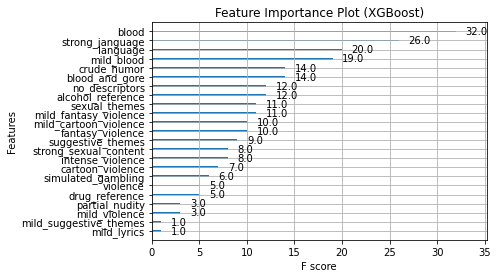

In [16]:
# Train the XGBoost model
bst = xgb.train(params, dtrain)

# Plot feature importance
xgb.plot_importance(bst)
plt.title('Feature Importance Plot (XGBoost)')
plt.show()


To my suprise, the model was significantly less accurate overall! I began to investigate exactly why this was occurring but finalized it down to the fact that it's simply due to the model I chose. I had theories about the fact that this model required me to manipulate the inputted data much more thus causing these inconsistencies to occur but from the data manipluation that did occur, none of the values ever changes only from strings to floats which remained equally distinct and consistent.

Overall, this taught me that choosing what model you used is a much larger decision than I thought. Learning the strengths and weaknesses of different models will provide to be a much important tool in the future for myself if I continue down the track of a Data Scientist. I had previously believed that more complicated models such as the GBM would lead to more accurate results, but this test clearly indicated otherwise.

Final notes I want to add. I attempted to create ROC curved for both of these models, but could not get the graphs to form properly. This was mainly due to issues I was having with multi-typed objects in attempting to create these curves. In the future I will definiately look to get help in this area in order to create those graphs for further analysis.